In [89]:
%autoreload 2 
%matplotlib inline

In [76]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [77]:
from __future__ import division

In [78]:
path = "../../data/"
import pandas as pd

In [79]:
import cPickle 
import matplotlib.pyplot as plt
import sys; sys.path.append("../")
import h5py

In [80]:
import plot_gal_prop as pg 
import extract_catalog as ec
import get_gal_centroids as get_gal 
import compute_distance as compDist

In [81]:
f = h5py.File(path + 
              "Illustris-1_fof_subhalo_myCompleteHaloCatalog_00135.hdf5")

In [82]:
star_h5file = \
    "../../data/test_results/" + \
    "test_stars_fhat_clst_no_density_128_06_24_16.h5"

In [83]:
star_fhats = h5py.File(star_h5file, "r")

In [84]:
metadata = compDist.retrieve_cluster_path(star_fhats)

In [85]:
R200C = f["Group"]['Group_R_Crit200'][:129]

In [86]:
df_list = map(lambda x: ec.extract_clst(f, x), range(129))  # get main df 

In [87]:
bright_gal_ixes = map(lambda x: 
                      get_gal.get_BCG_ixes(x, brightest_only=False), 
                      df_list)

# Examine all peaks and I band luminosity maps

In [93]:
metadata_list = metadata[-1].split('/')

In [101]:
total_clstNo = sorted([int(path.split('/')[0]) for path in metadata])

In [102]:
fixed_path = '/'.join(metadata_list[1:])

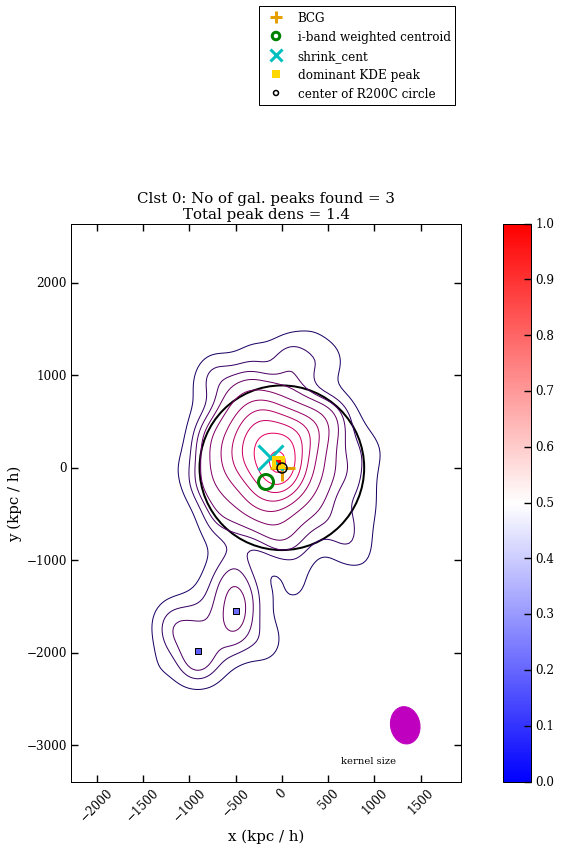

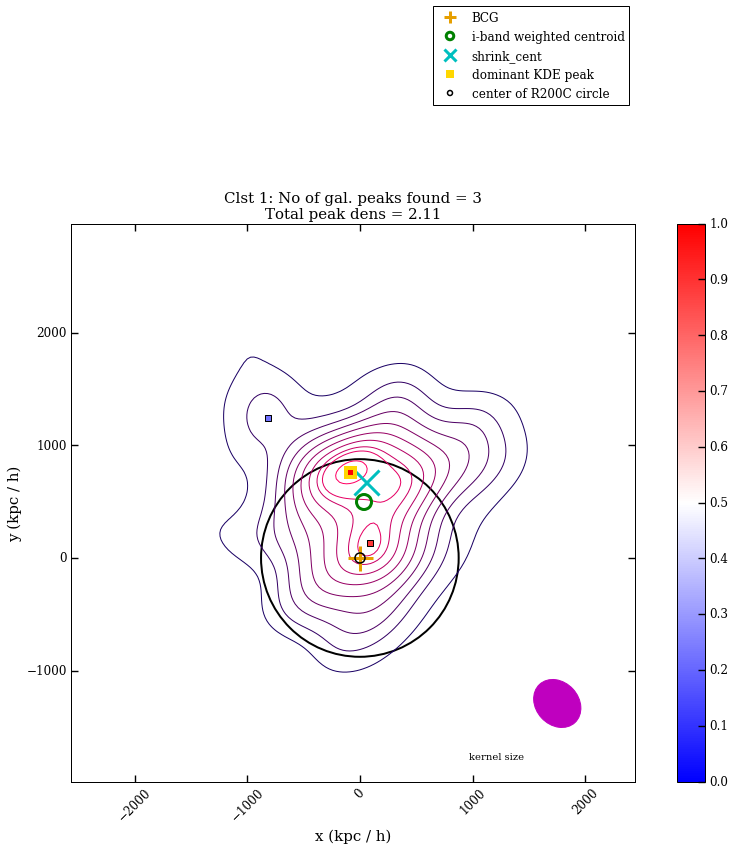

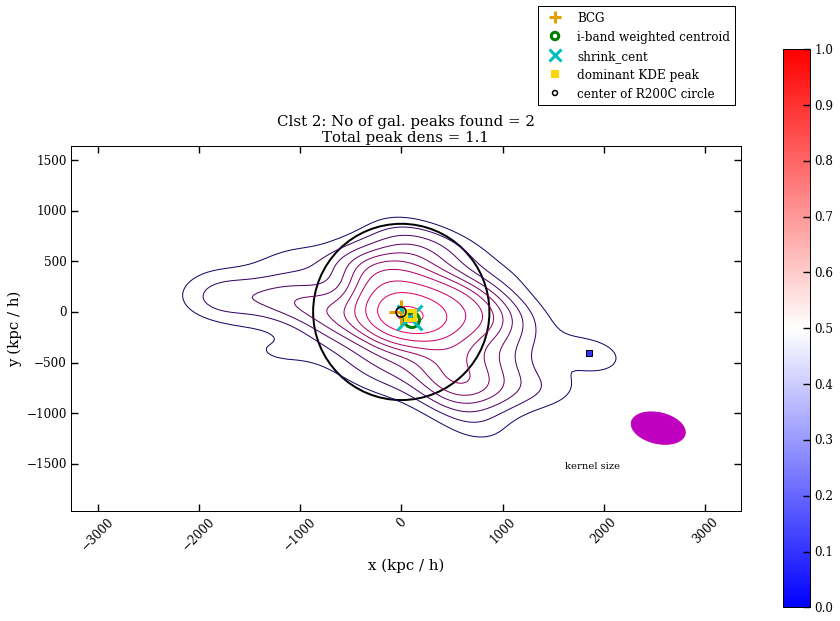

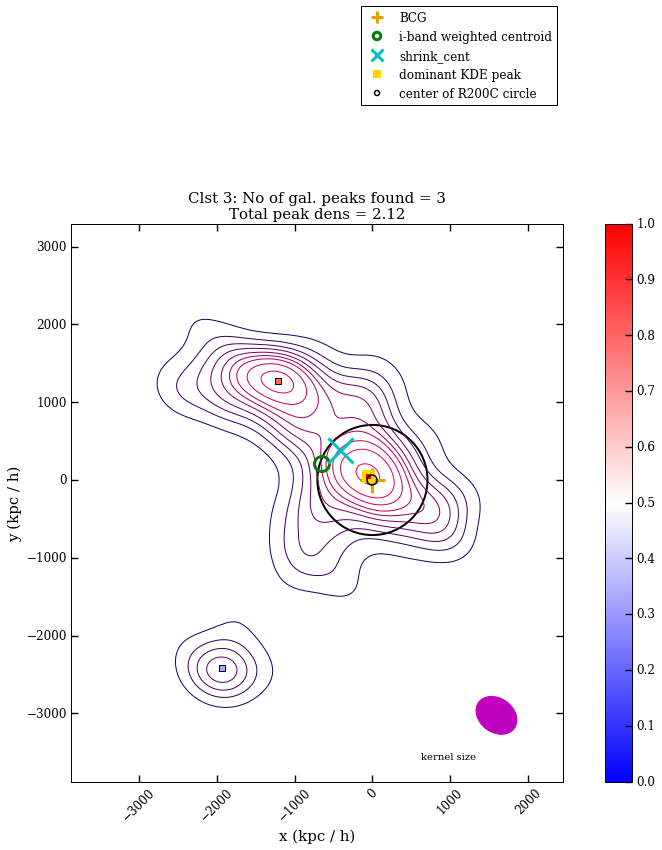

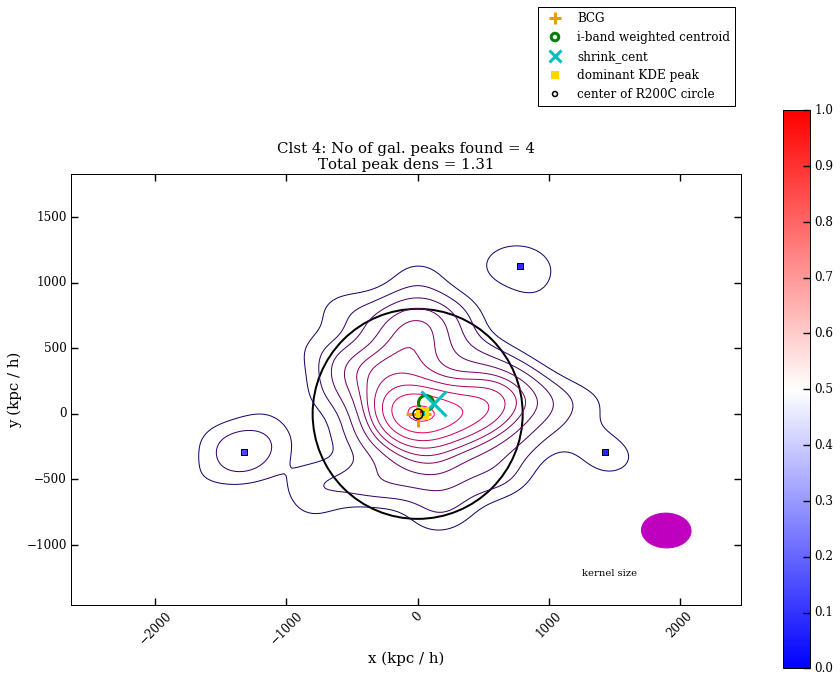

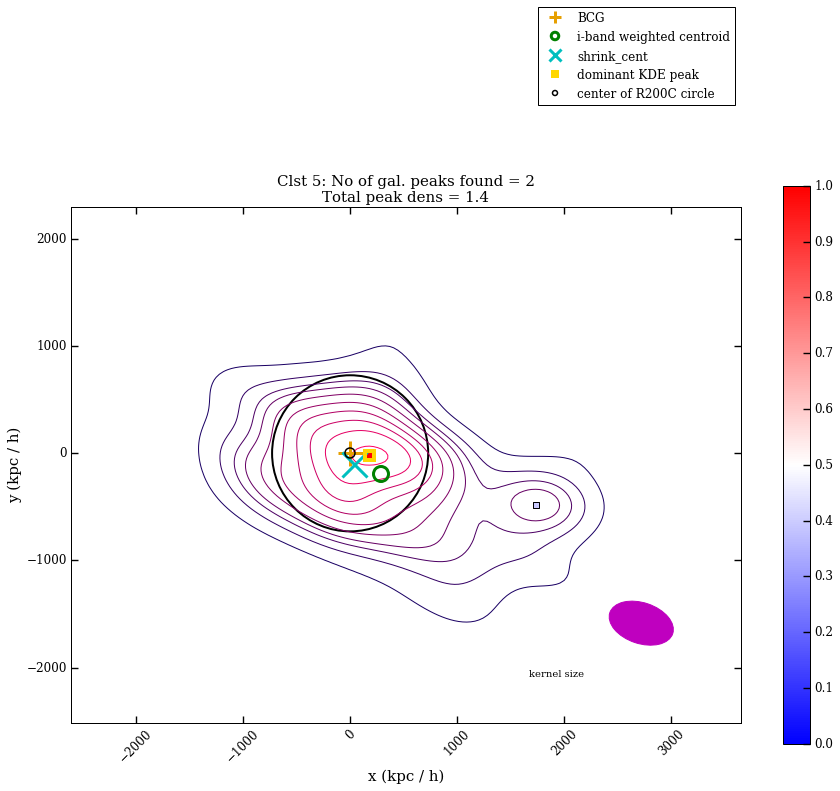

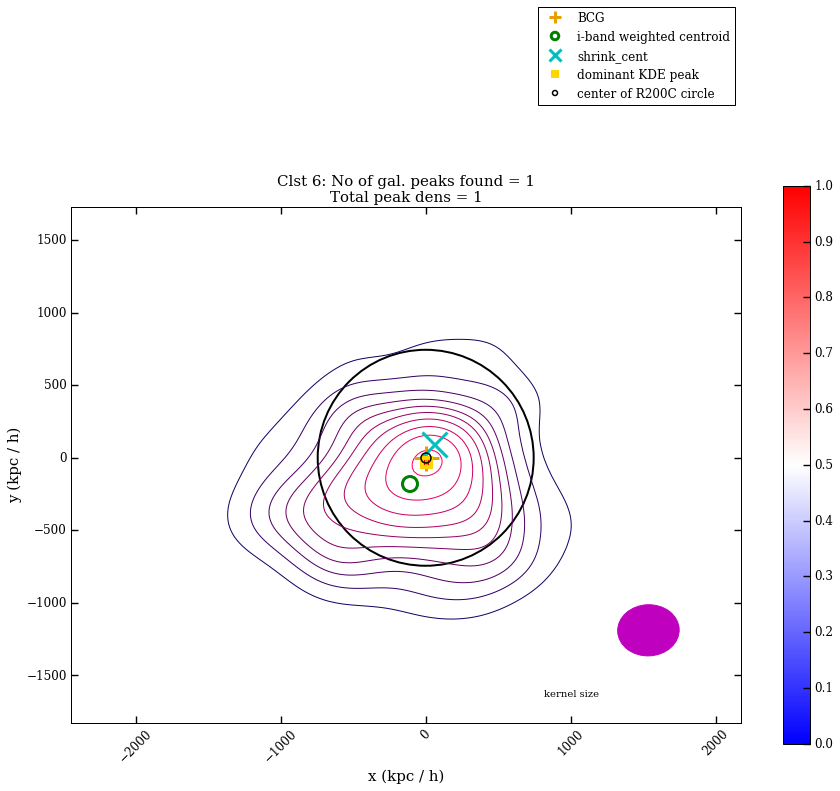

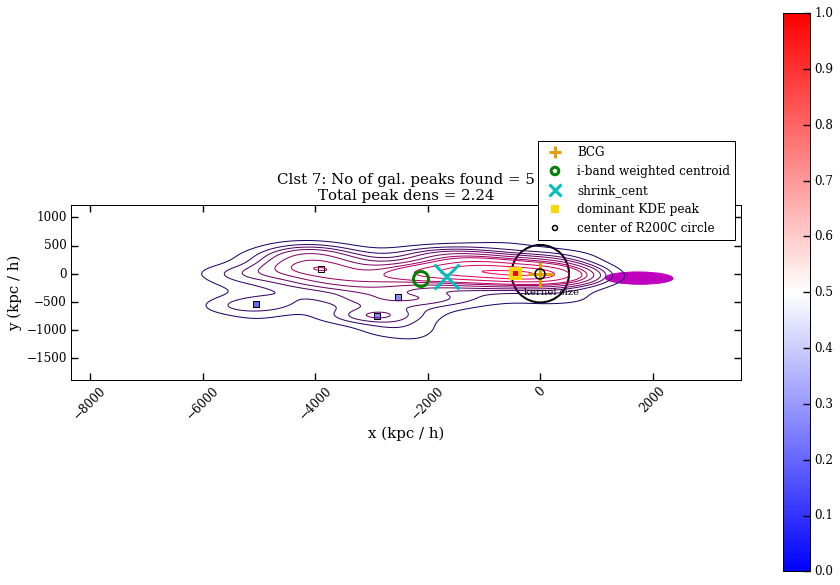

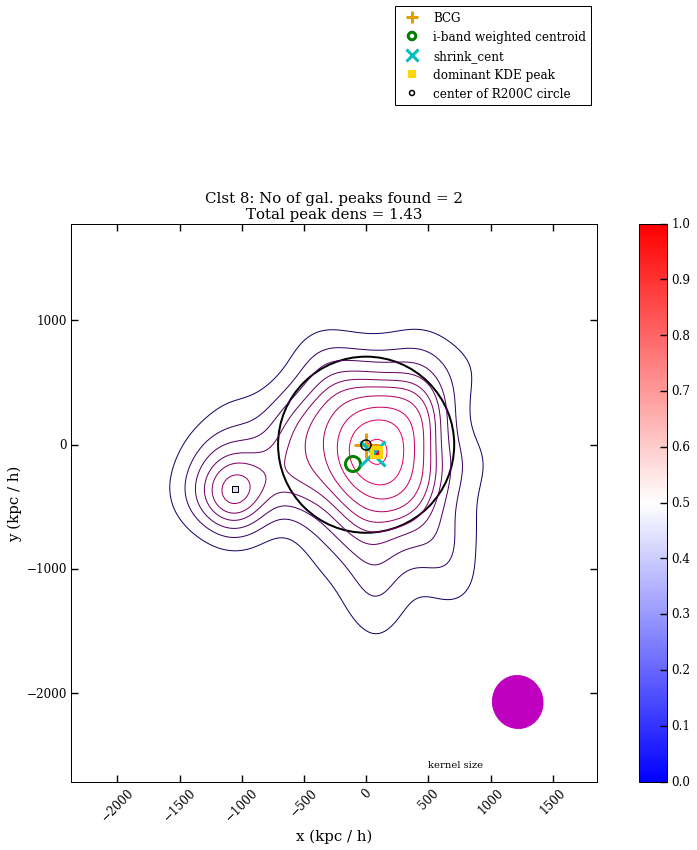

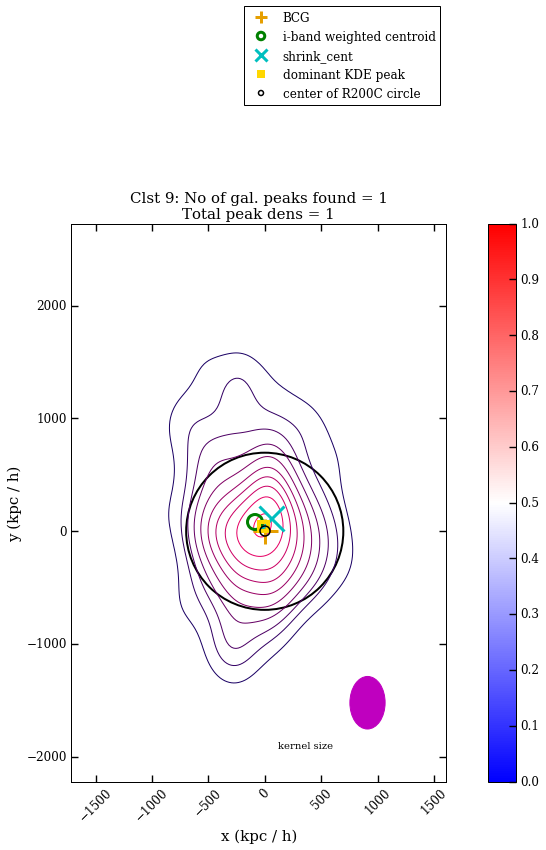

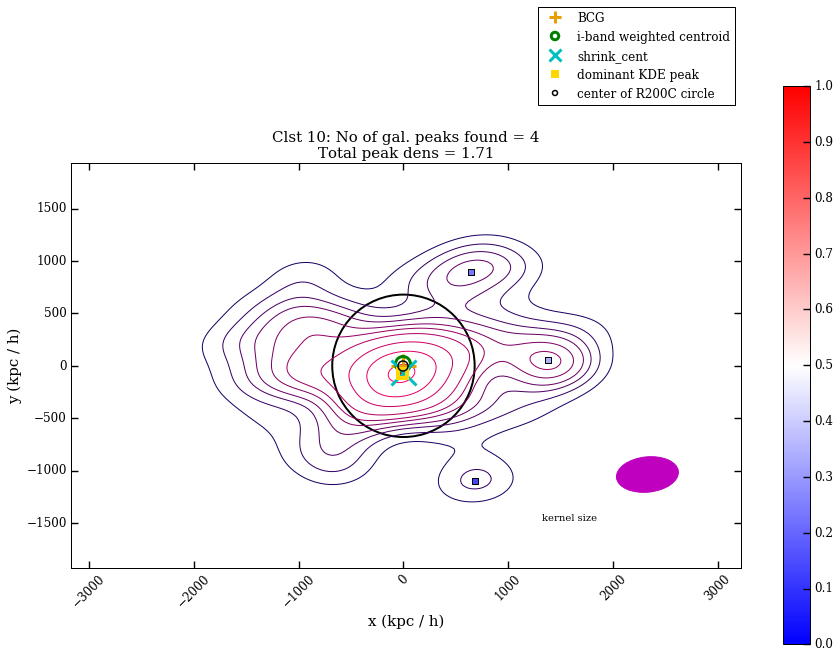

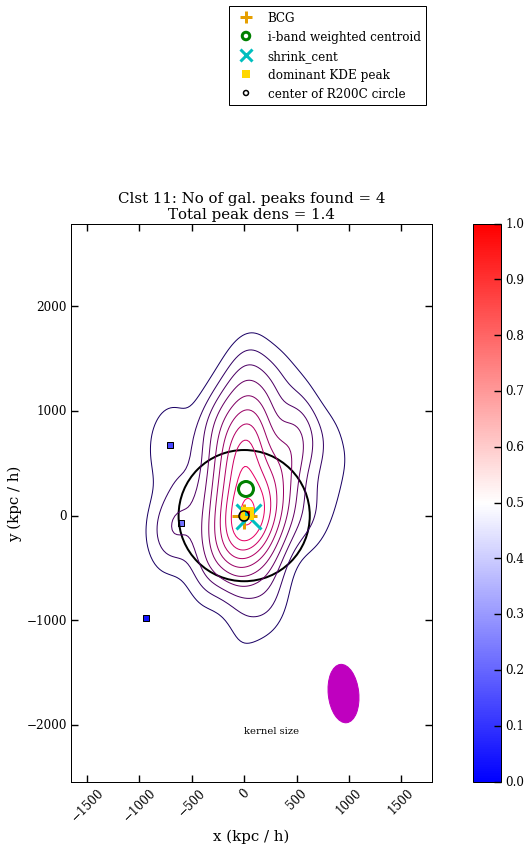

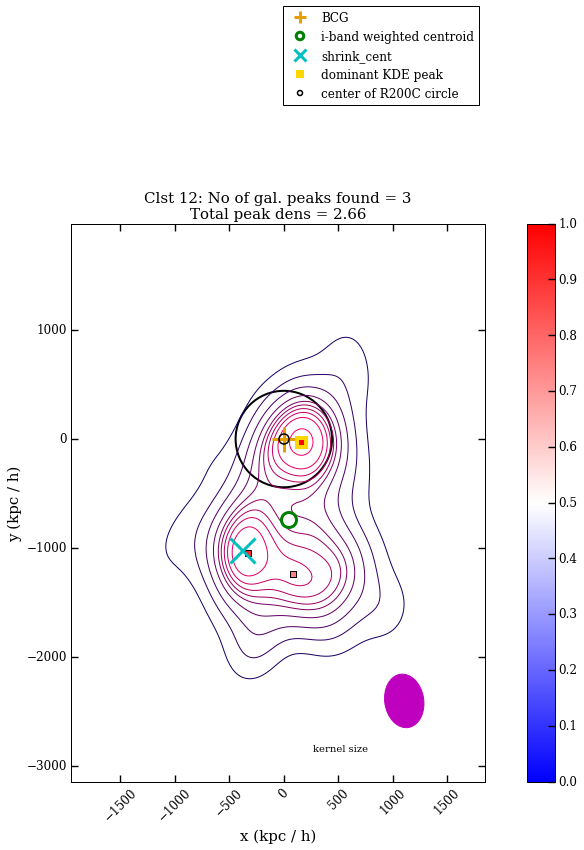

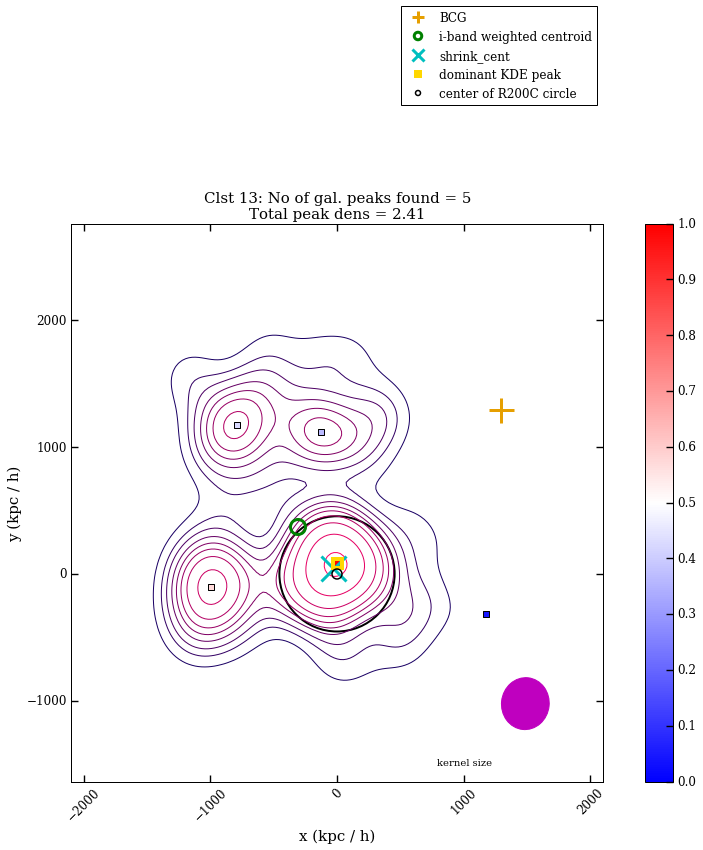

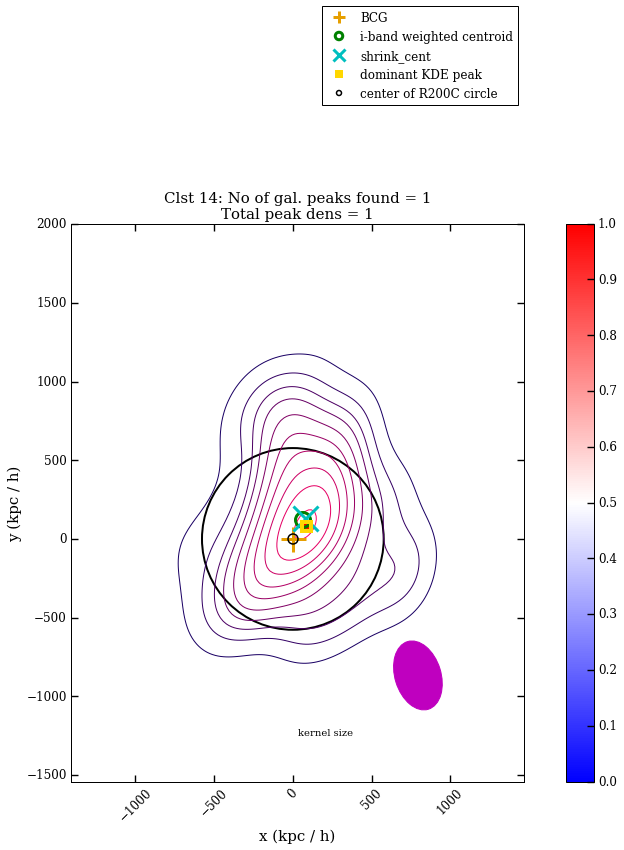

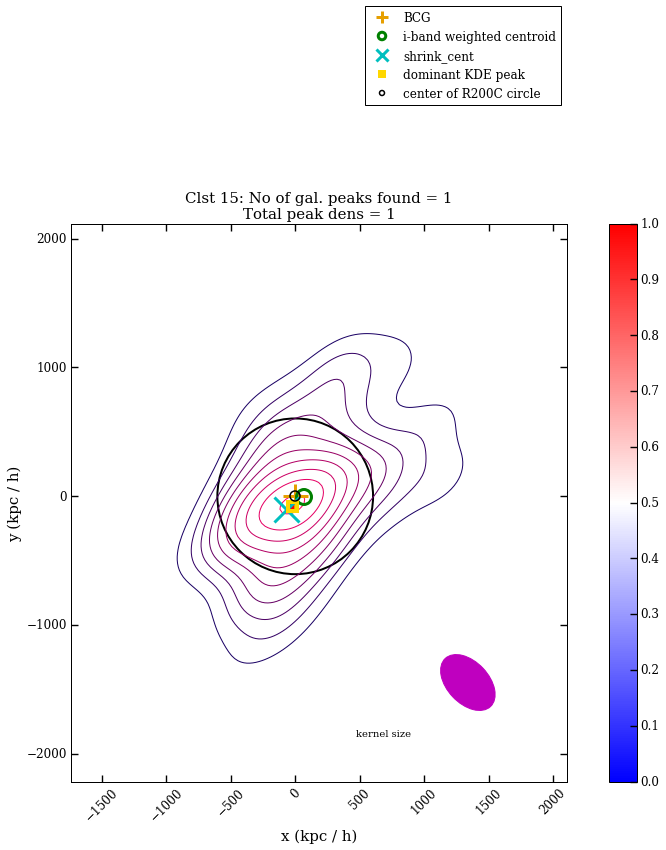

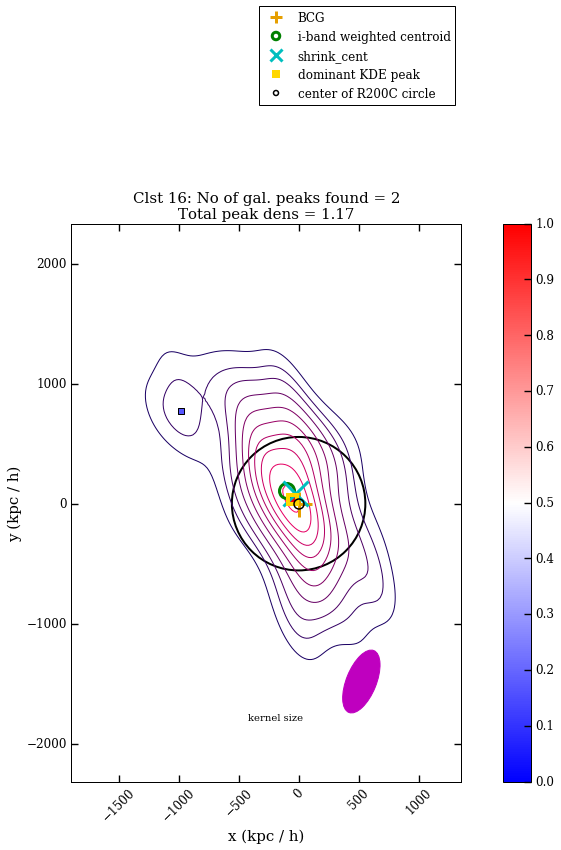

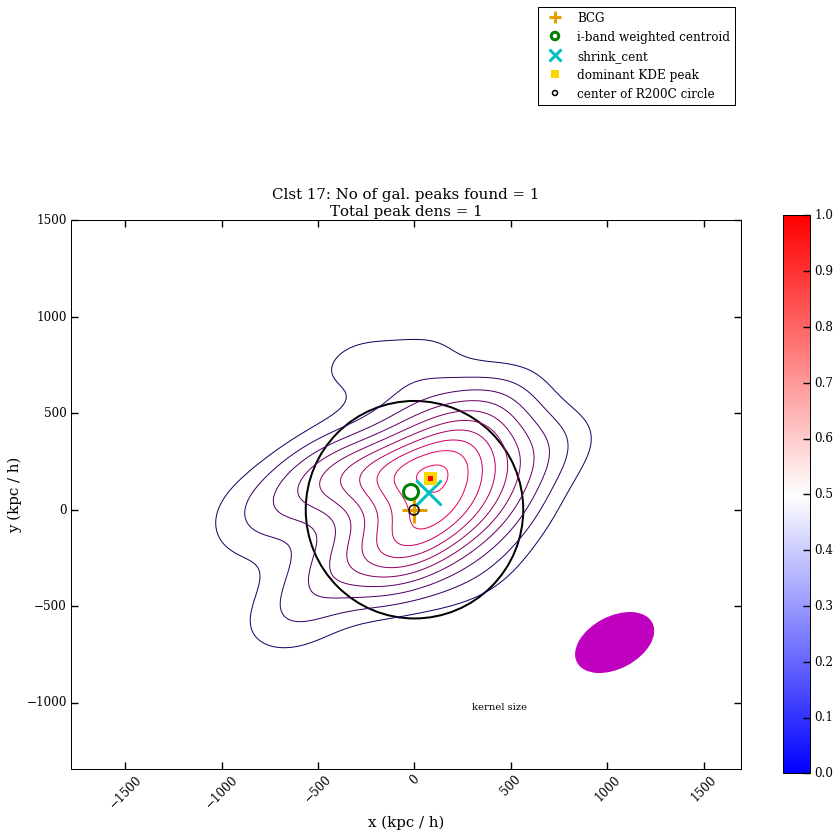

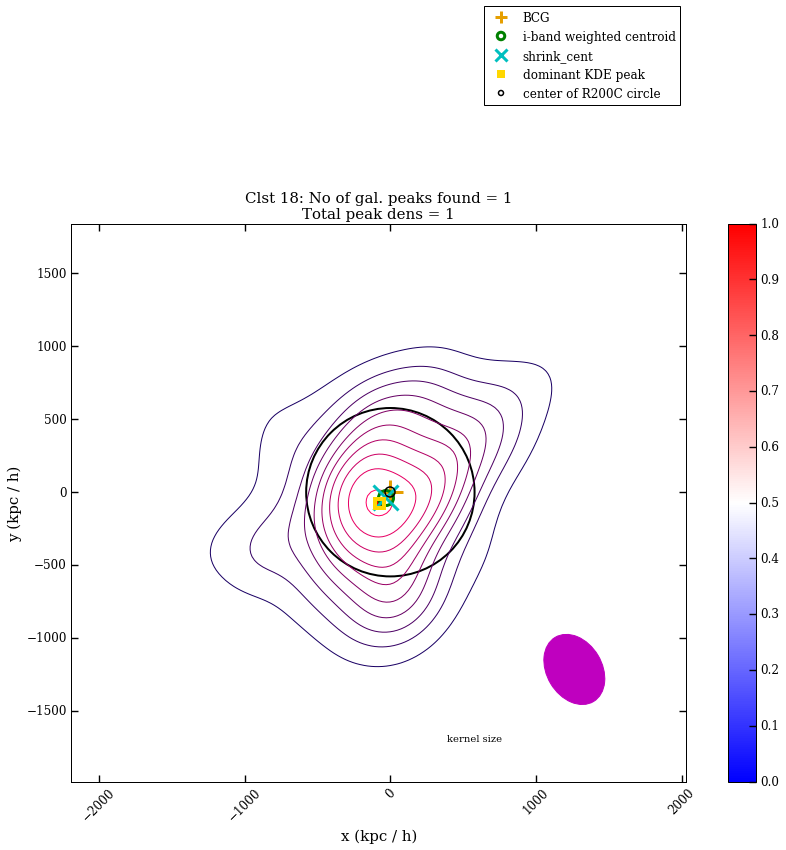

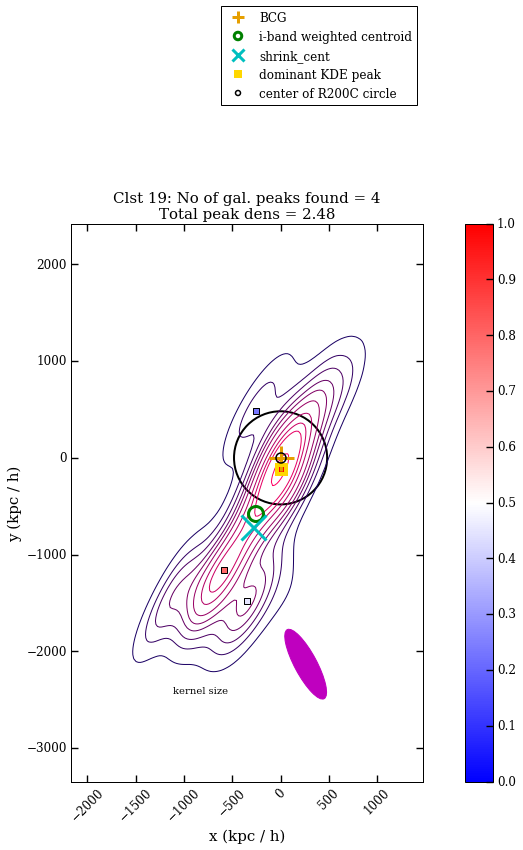

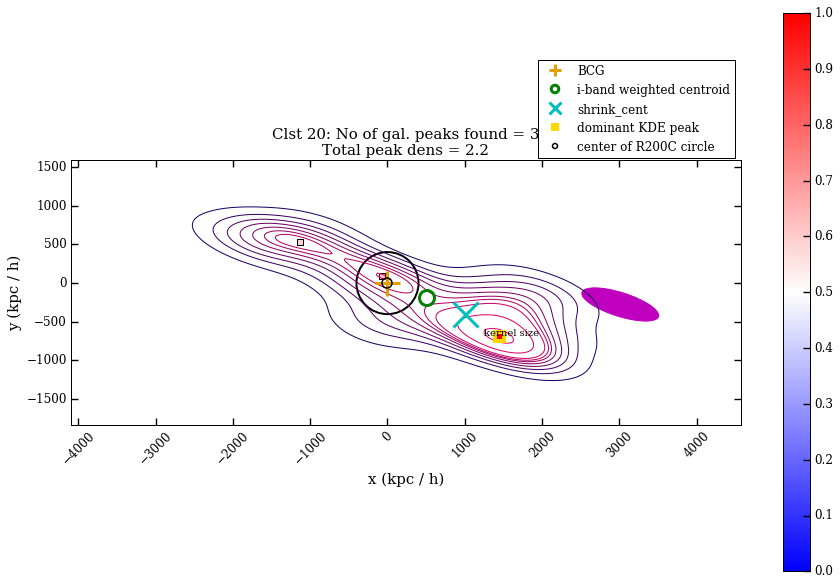

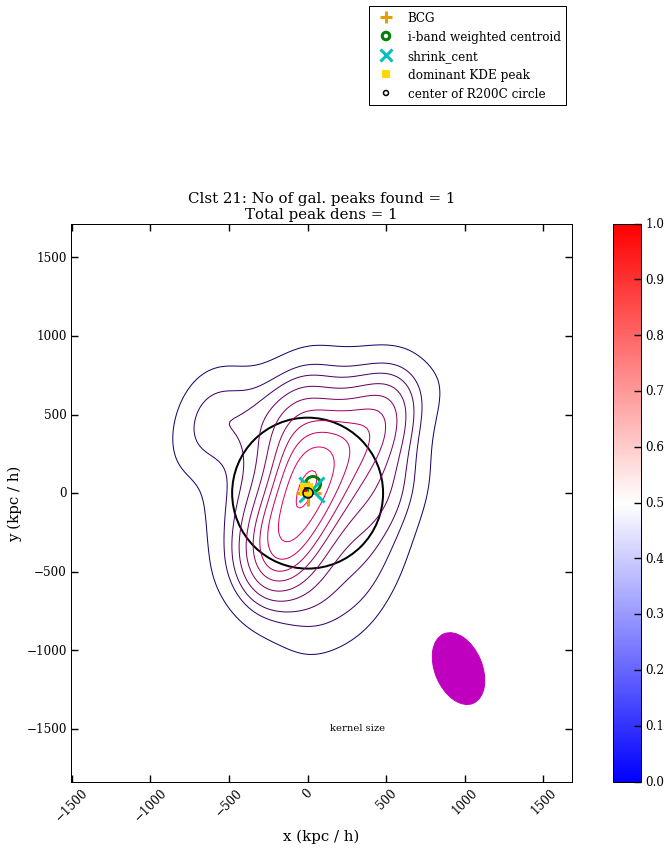

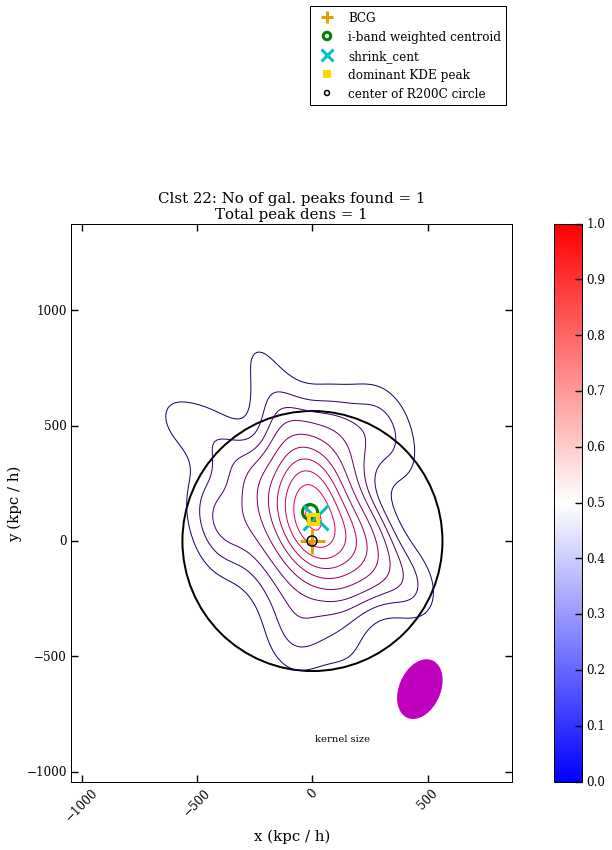

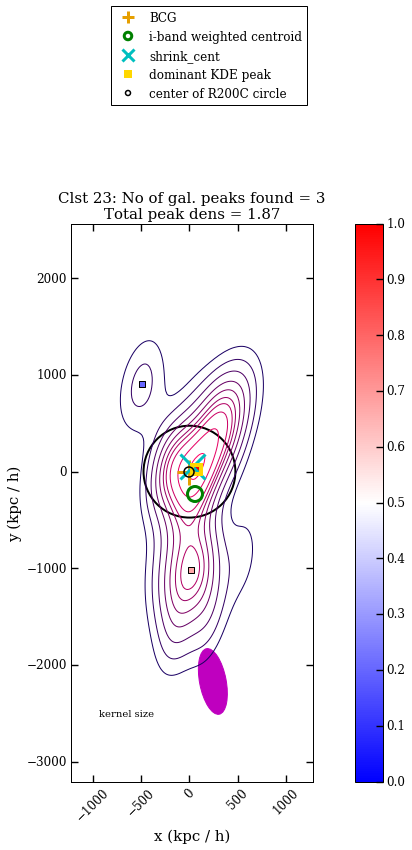

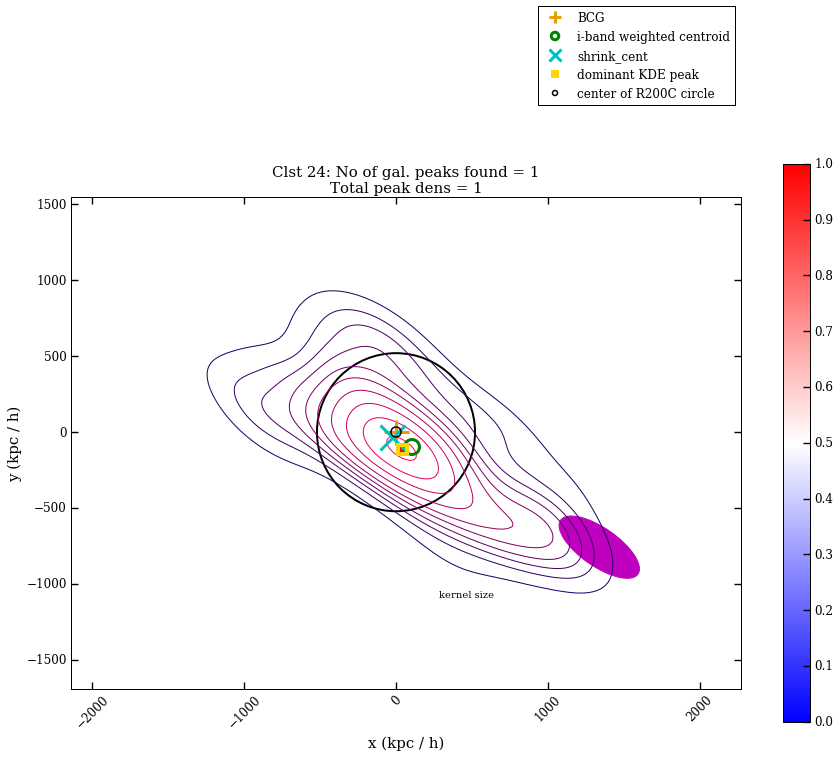

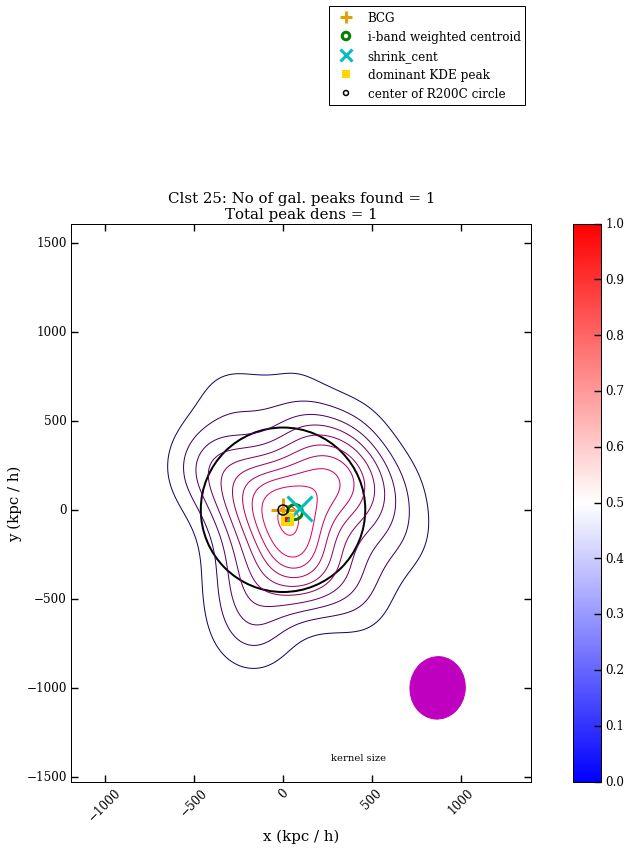

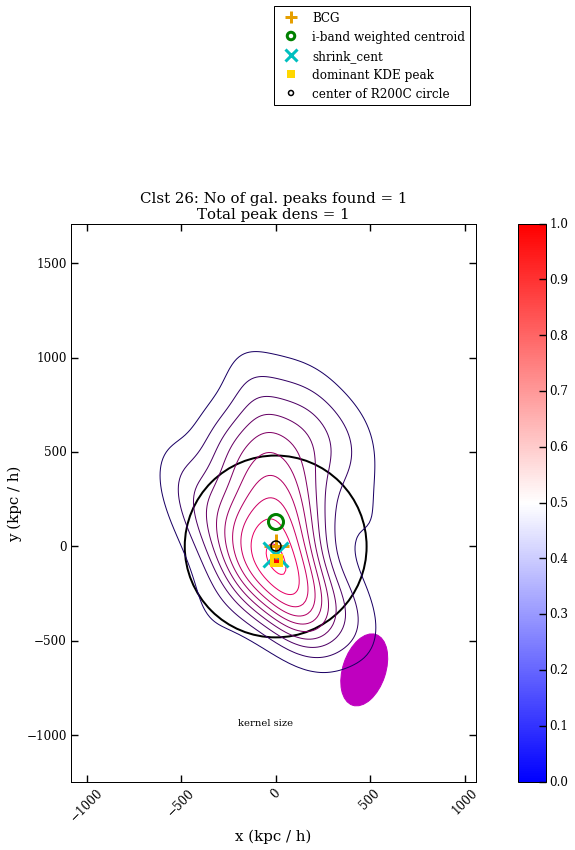

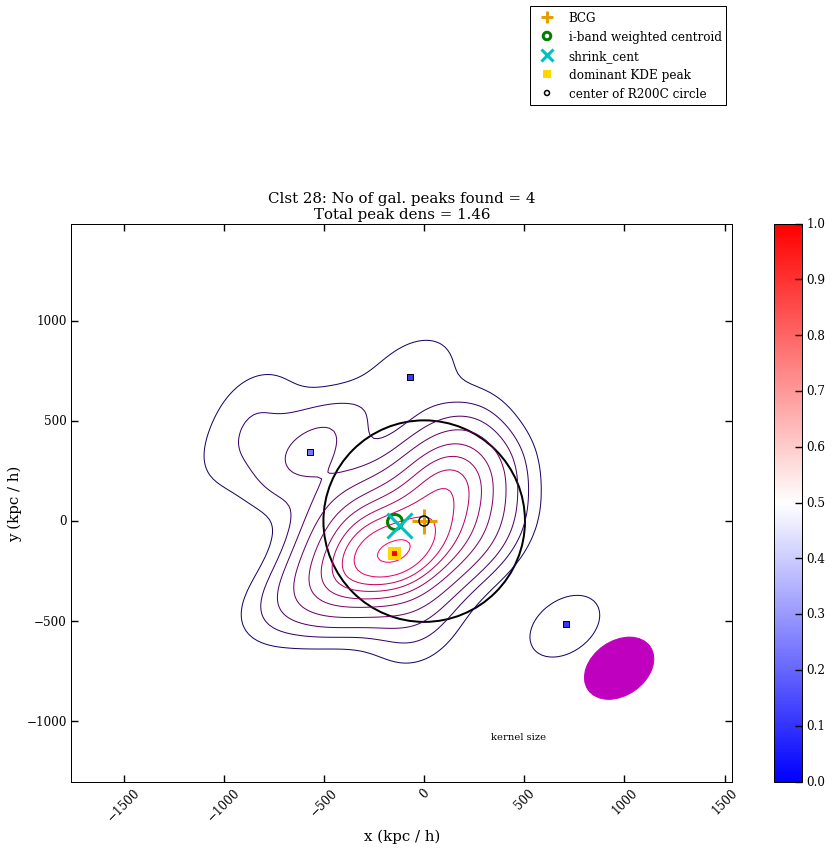

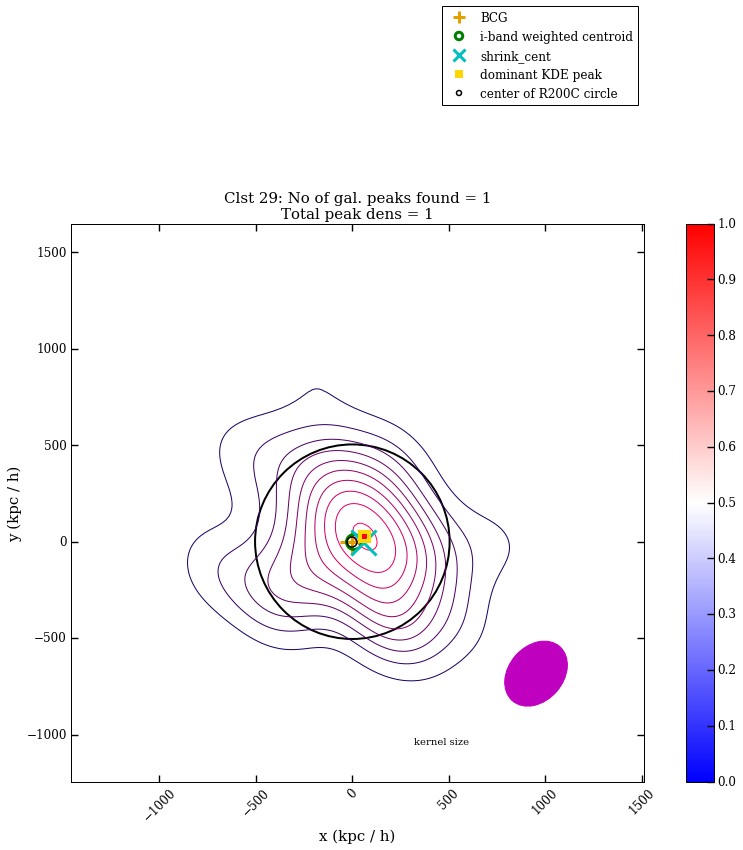

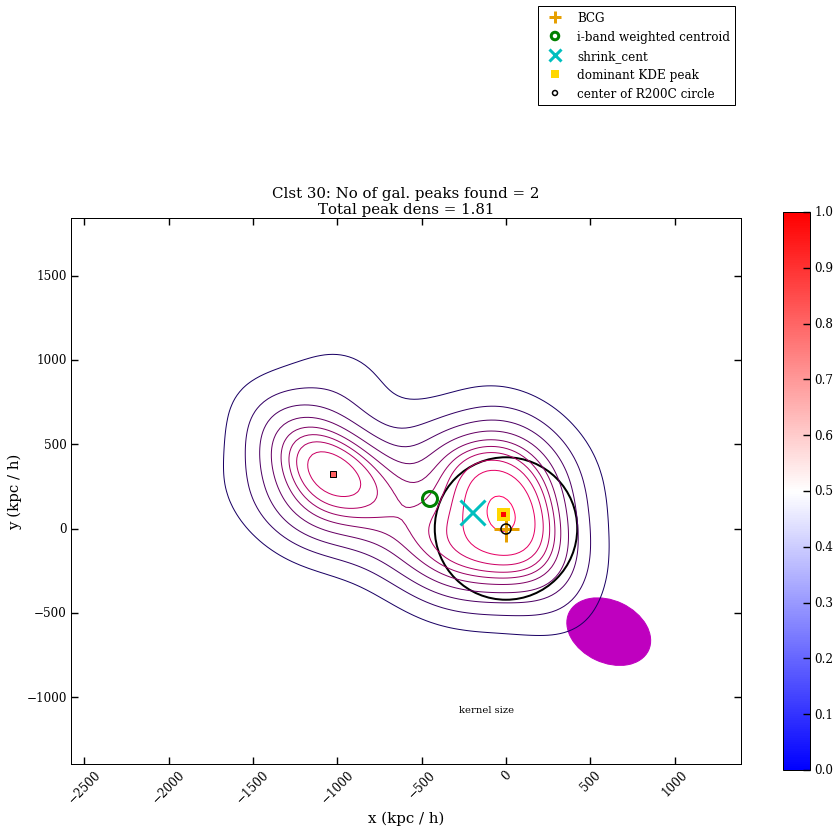

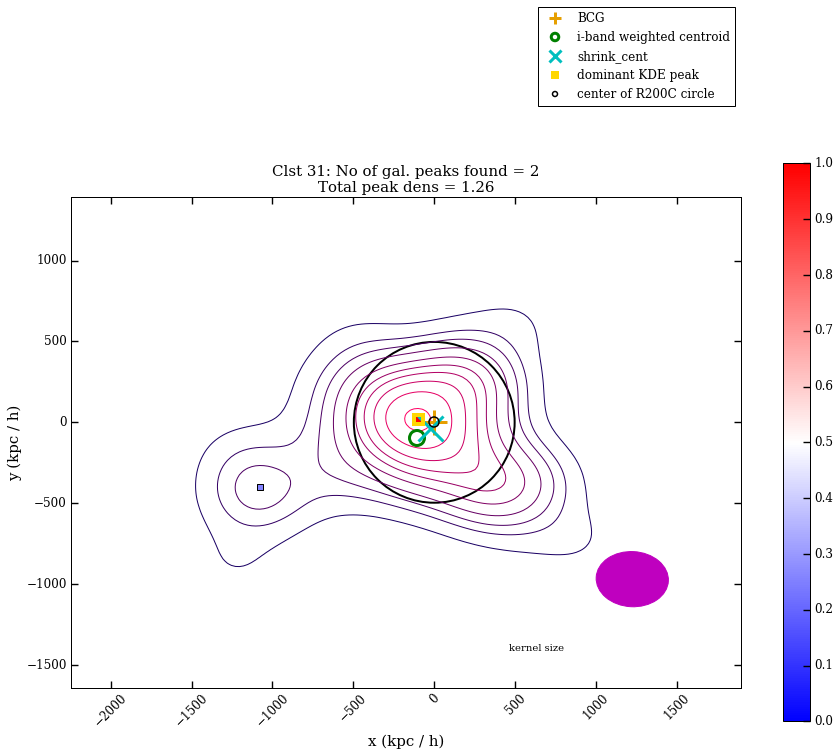

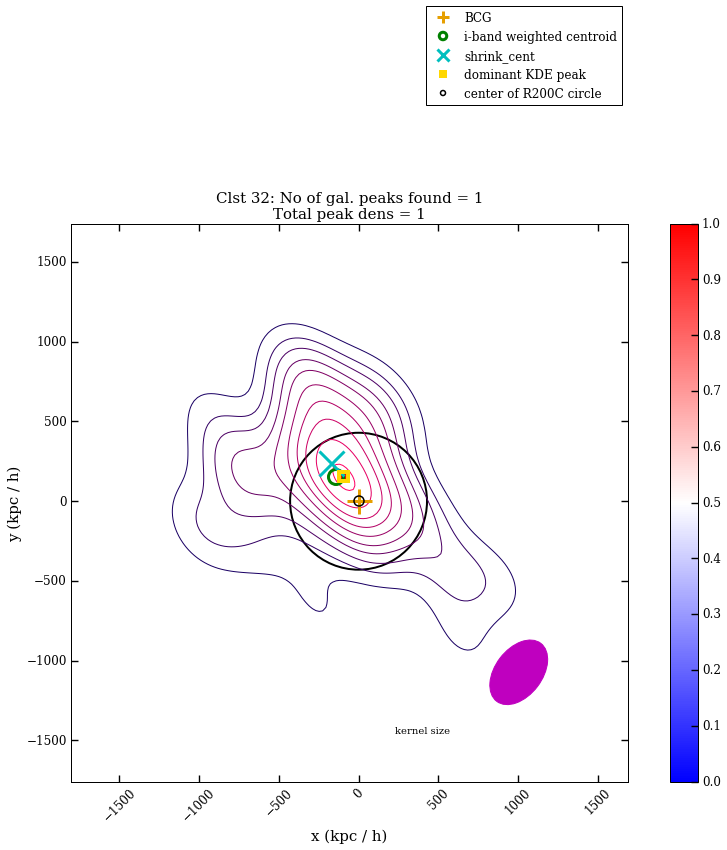

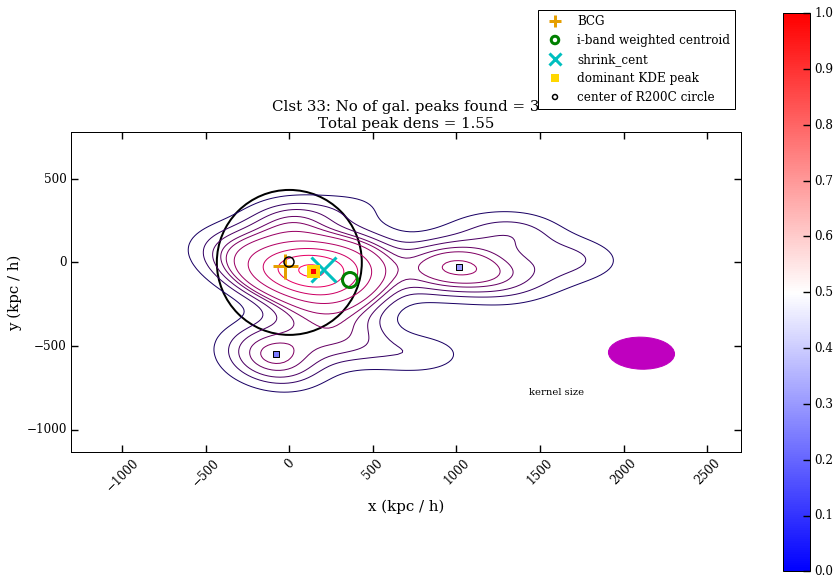

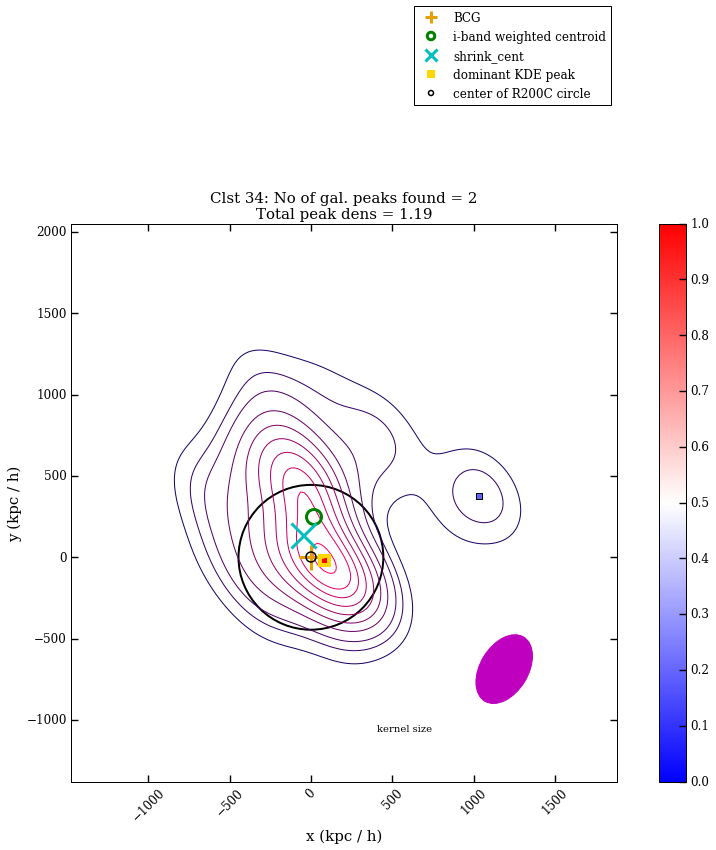

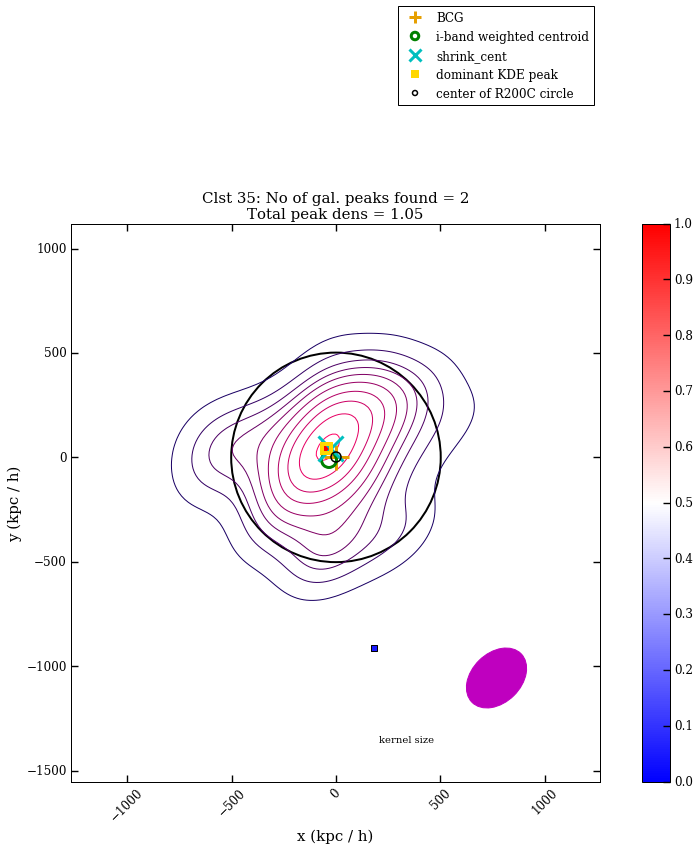

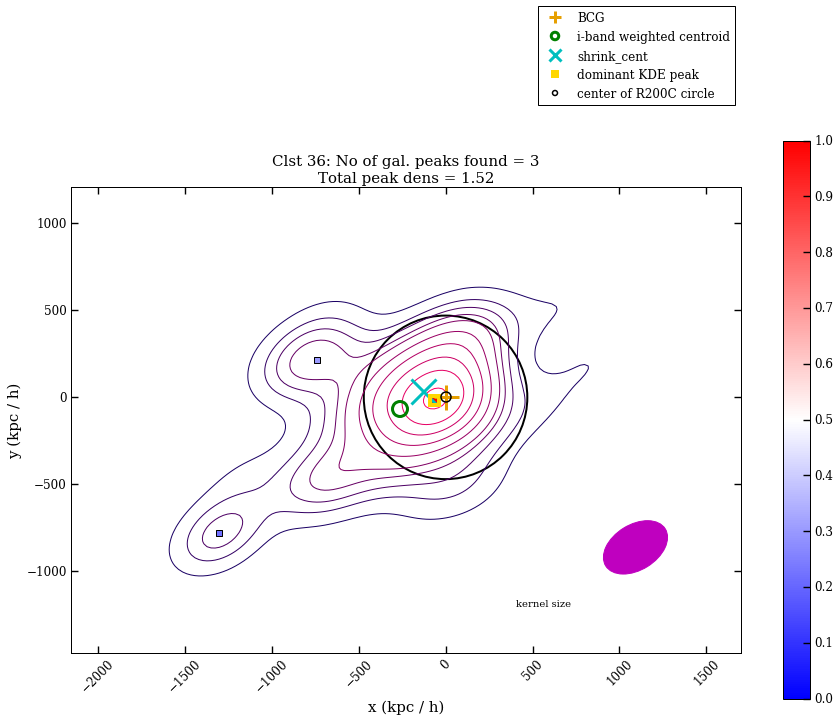

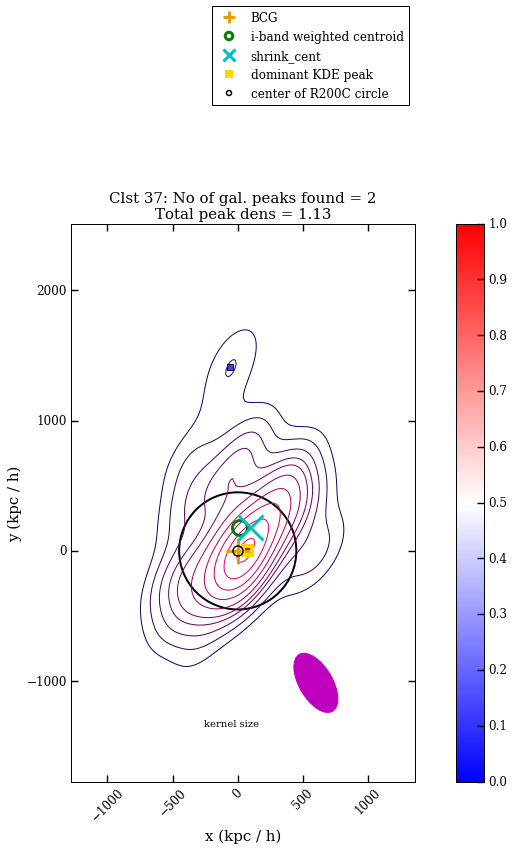

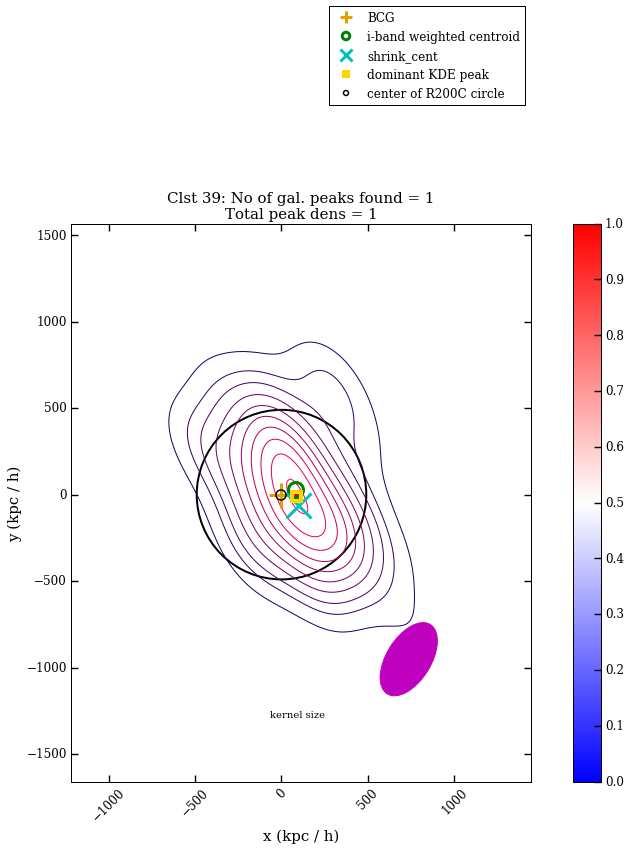

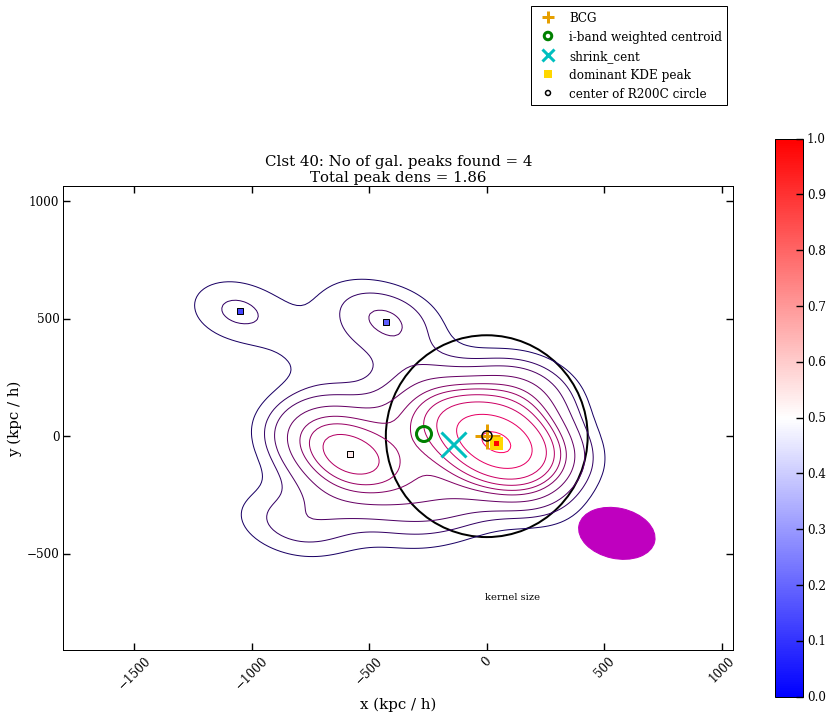

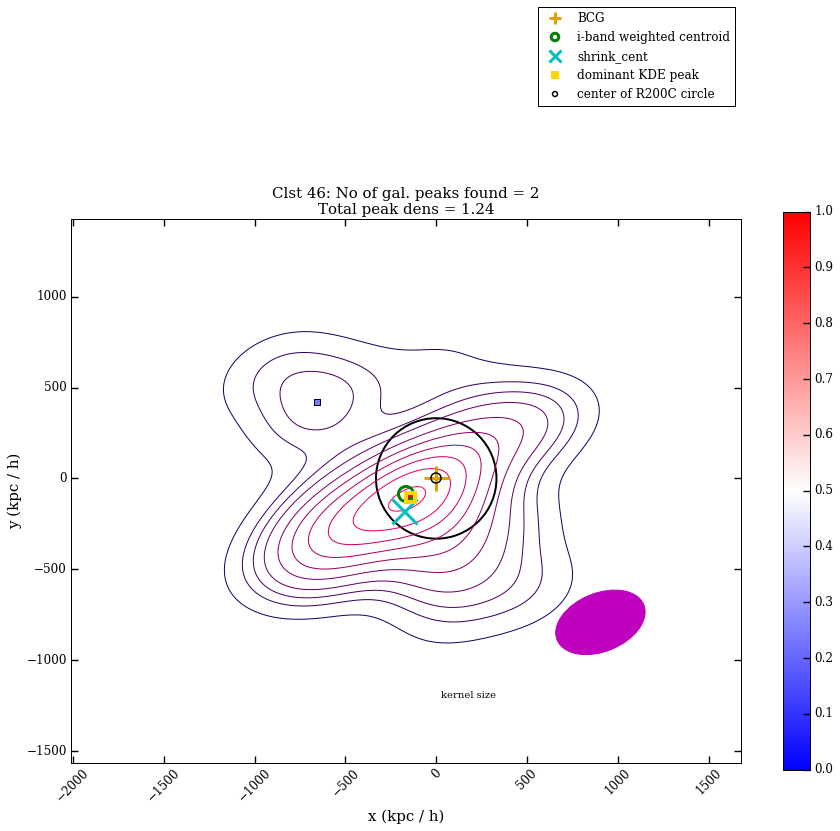

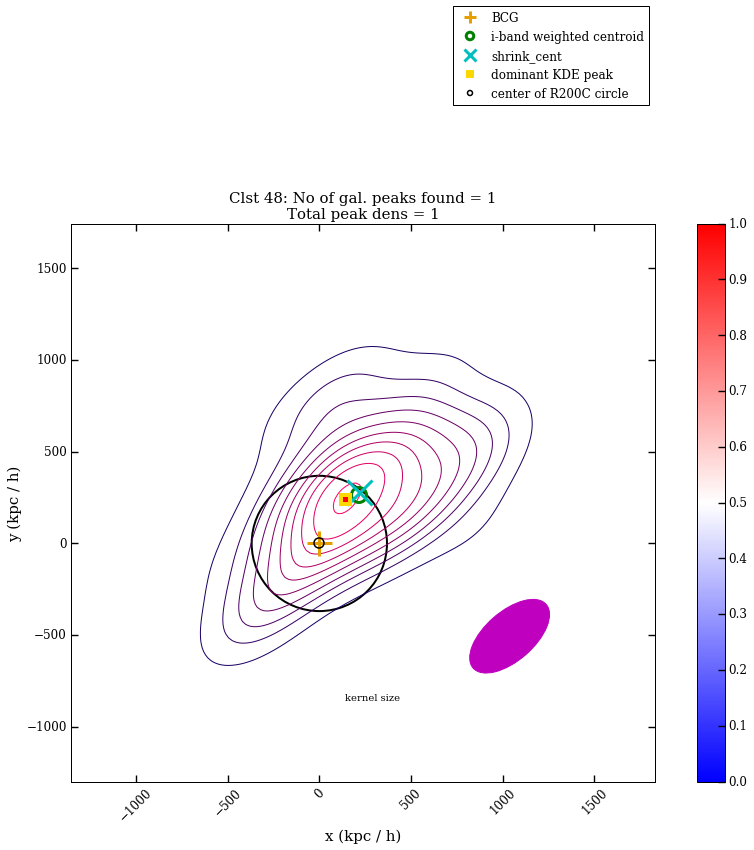

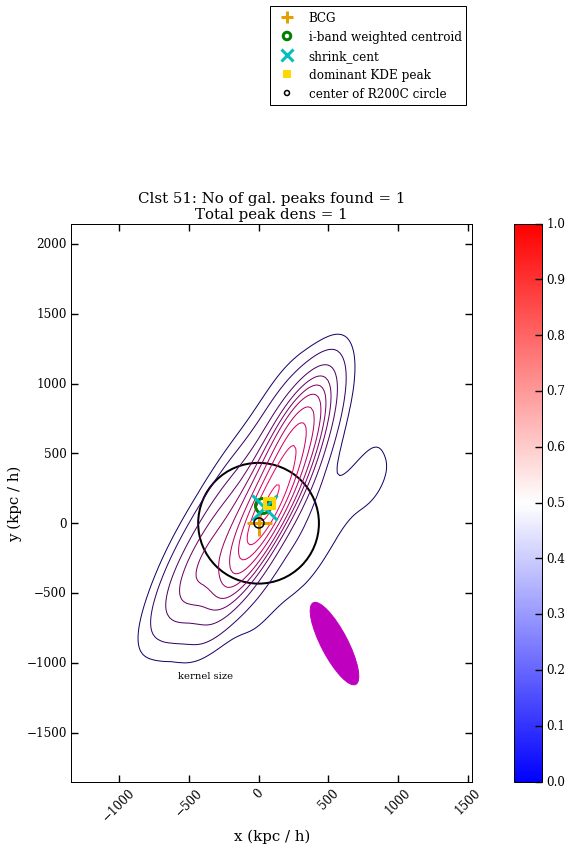

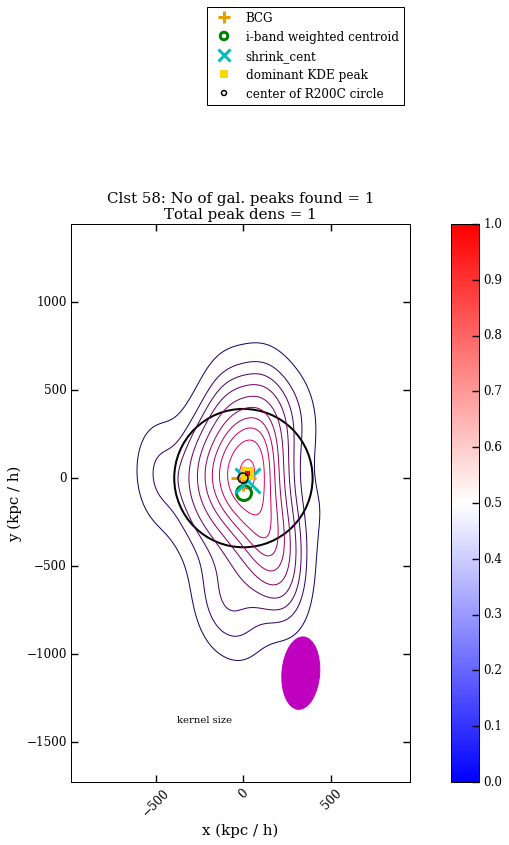

In [103]:
for clstNo in total_clstNo:
    path = str(clstNo) + '/' + fixed_path
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, aspect='equal')
    star_fhat = star_fhats[path]
    
    pg.plot_KDE_peaks(star_fhat, allPeaks=True, 
                      R200C=R200C[clstNo], showData=True,
                      clstNo=clstNo, ax=ax, fig=fig)
    
    plt.close()